In [3]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00a 0:00:01


In [41]:
from PIL import Image

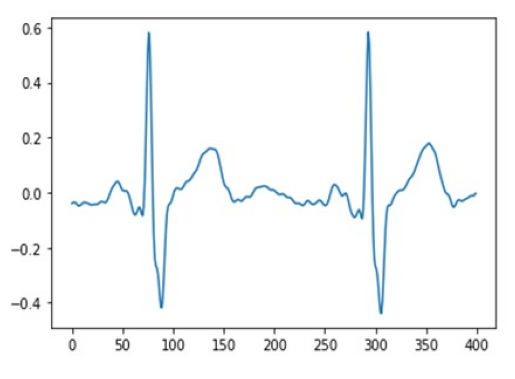

In [45]:
# Load the image
image_path = "/kaggle/input/images/Images/Normal ECG wave.jpg"
image = Image.open(image_path).convert('RGB')
plt.imshow(image)
plt.axis('off')
plt.show()

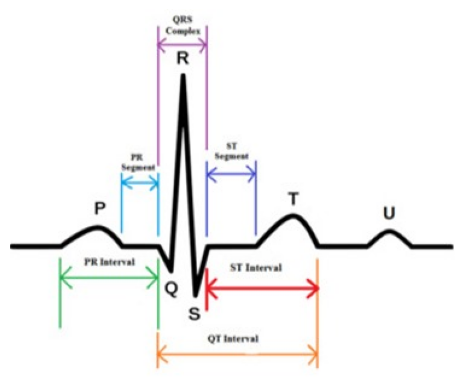

In [46]:
# Load the image
image_path = "/kaggle/input/images/Images/PQRST.jpg"
image = Image.open(image_path).convert('RGB')
plt.imshow(image)
plt.axis('off')
plt.show()

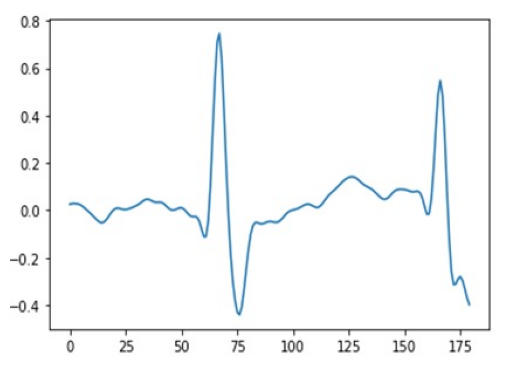

In [47]:
# Load the image
image_path = "/kaggle/input/images/Images/AF ECG wave.jpg"
image = Image.open(image_path).convert('RGB')
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import wfdb
import pandas as pd
import neurokit2 as nk
from wfdb import processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
device = torch.device('cuda')

In [6]:
# df = pd.read_csv('./the_final_dataset.csv')
df = pd.read_csv('/kaggle/input/the-final-dataset/the_final_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54.1,55.1,56.1,57.1,58.1,59.1,60.1,61.1,62.1,63.1
0,0,0.060204,0.073714,0.076284,0.062358,0.033744,-0.002287,-0.037112,-0.064459,-0.082022,...,-0.428749,0.236679,10.305376,0.314013,0.241162,3.664498,0.694447,0.673222,1.480126,1.087816
1,1,0.951834,0.383121,-0.317134,-0.942993,-1.339963,-1.456975,-1.336347,-1.066977,-0.739398,...,-0.428749,0.236679,10.305376,0.314013,0.241162,3.664498,0.694447,0.673222,1.480126,1.087816
2,2,1.357932,0.935925,0.275371,-0.449210,-1.038282,-1.354164,-1.370175,-1.160217,-0.846352,...,-0.426431,0.081362,4.479552,0.617013,1.049822,3.664498,0.782308,0.713771,1.470210,1.087816
3,3,1.352436,1.018044,0.422170,-0.286659,-0.912672,-1.298000,-1.384730,-1.221965,-0.923839,...,-0.426431,0.081362,4.479552,0.617013,1.049822,3.664498,0.782308,0.713771,1.470210,1.087816
4,4,1.173184,0.688235,0.023613,-0.639380,-1.121397,-1.321206,-1.246830,-0.991342,-0.676797,...,-0.448061,0.096895,4.714317,0.365321,0.575364,3.392747,0.724796,0.613258,1.494872,1.138597


In [8]:
df = df.fillna(0)

In [9]:
X = df.drop(['Class'],axis=1)
Y = df['Class']
classes = list(Y.unique())
Y = []
for i in df['Class']:
    if(i=='(N'):
        Y.append(0)
    else:
        Y.append(1)
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)

In [11]:
X_train_ts, X_train_ecg = X_train.iloc[:,-64:],X_train.iloc[:,3:1703]
X_val_ts, X_val_ecg = X_val.iloc[:,-64:],X_val.iloc[:,3:1703]
X_train_ts.drop(['58.1'],axis=1,inplace=True)
X_val_ts.drop(['58.1'],axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler

# Convert pandas DataFrames to numpy arrays
X_train_ts_np = X_train_ts.values
X_val_ts_np = X_val_ts.values
X_train_ecg_np = X_train_ecg.values
X_val_ecg_np = X_val_ecg.values

# Scaling
scaler = StandardScaler()
X_train_ts_np = scaler.fit_transform(X_train_ts.values)
X_val_ts_np = scaler.transform(X_val_ts.values)

scaler = StandardScaler()
X_train_ecg_np = scaler.fit_transform(X_train_ecg.values)
X_val_ecg_np = scaler.transform(X_val_ecg.values)

# Reshape data to add a channel dimension
X_train_ts_np = np.expand_dims(X_train_ts_np, axis=1)
X_val_ts_np = np.expand_dims(X_val_ts_np, axis=1)
X_train_ecg_np = np.expand_dims(X_train_ecg_np, axis=1)
X_val_ecg_np = np.expand_dims(X_val_ecg_np, axis=1)

# Convert numpy arrays to PyTorch tensors
X_train_ts_tensor = torch.tensor(X_train_ts_np, dtype=torch.float32).to(device)
X_train_ecg_tensor = torch.tensor(X_train_ecg_np, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_val_ts_tensor = torch.tensor(X_val_ts_np, dtype=torch.float32).to(device)
X_val_ecg_tensor = torch.tensor(X_val_ecg_np, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

In [13]:
X_train_ts

,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,...,53.1,54.1,55.1,56.1,57.1,59.1,60.1,61.1,62.1,63.1
42586,66.334776,343.214286,412.946482,444.578971,462.719054,1.203174,1.295339,184.5,2.2239,0.012054,...,-0.716113,-0.472233,0.405509,15.628752,0.304882,3.039149,0.569466,8.695376e-02,1.389033,1.087816
27972,50.609310,376.785714,344.683172,378.336745,393.785165,0.914799,1.004116,250.0,20.0151,0.080060,...,-0.942234,-0.445216,0.128397,6.206705,0.324545,3.807355,0.695104,5.176901e-01,1.435516,1.087816
3790,79.468379,328.285714,513.307440,559.330713,582.169814,1.563600,1.703792,122.0,14.0847,0.115448,...,-0.611134,-0.471871,0.104909,4.950608,0.304882,3.182006,0.610153,3.218676e-01,1.422233,1.087816
40286,58.320766,347.500000,435.191868,473.925018,493.275525,1.252351,1.363813,178.5,5.9304,0.033224,...,-1.017094,-0.450048,0.257037,11.024793,0.304882,3.521641,0.531617,2.232530e-02,1.412593,1.087816
12050,49.321737,365.142857,345.651193,373.608907,388.864405,0.946619,1.023186,230.0,2.9652,0.012892,...,-0.577413,-0.478978,0.306107,12.017424,0.304882,2.950212,0.502475,3.349178e-17,1.379157,1.087816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,49.944205,363.428571,349.558780,378.118927,393.558454,0.961836,1.040422,226.0,2.9652,0.013120,...,-0.684766,-0.474608,0.306818,12.141995,0.304882,2.950212,0.495724,2.736893e-18,1.379827,1.087816
44732,73.568372,319.642857,490.865736,542.114450,564.230836,1.535669,1.696001,114.0,25.2042,0.221089,...,-0.864594,-0.451125,0.164578,7.520120,0.310928,3.378783,0.674023,5.143956e-01,1.515902,1.087816
38158,57.590620,346.000000,410.113305,443.431202,461.537800,1.185299,1.281593,185.5,4.4478,0.023977,...,-0.827904,-0.468617,0.248084,10.199055,0.304882,3.182006,0.509467,-8.182272e-18,1.377420,1.087816
860,51.511368,323.785714,494.381382,538.335897,560.055744,1.526878,1.662630,114.5,29.6520,0.258969,...,-0.582977,-0.462202,0.103670,5.044042,0.321141,3.521641,0.787572,5.235967e-01,1.480696,1.087816


In [14]:
X_val_ecg

,2,3,4,5,6,7,8,9,10,11,...,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701
44310,0.156510,-0.034152,-0.168608,-0.215997,-0.188144,-0.125552,-0.070477,-0.045820,-0.050583,-0.069464,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7893,0.332654,0.079242,-0.086584,-0.152896,-0.149986,-0.122988,-0.106297,-0.112369,-0.135375,-0.162231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37192,0.204424,-0.387391,-0.782189,-0.900422,-0.783280,-0.548618,-0.319460,-0.169610,-0.109954,-0.109619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39381,0.170262,-0.340931,-0.700169,-0.838628,-0.773947,-0.586101,-0.371805,-0.203388,-0.109656,-0.080938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43085,0.259066,0.071268,-0.091717,-0.195103,-0.228363,-0.204136,-0.149110,-0.091659,-0.051268,-0.033758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.036709,-0.178069,-0.399511,-0.570177,-0.647199,-0.619982,-0.511641,-0.365153,-0.223696,-0.115617,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3777,0.524888,0.148423,-0.106268,-0.219600,-0.230401,-0.200089,-0.177015,-0.180211,-0.204203,-0.233919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48859,1.191533,0.841852,0.481323,0.174419,-0.042970,-0.170894,-0.233498,-0.260271,-0.272877,-0.281835,...,-0.016244,-0.016895,-0.012298,-0.004642,0.003077,0.008654,0.011582,0.012689,0.012983,0.012705
38730,-0.088733,-0.455213,-0.672640,-0.709558,-0.601501,-0.422586,-0.247768,-0.124604,-0.064222,-0.050228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


1


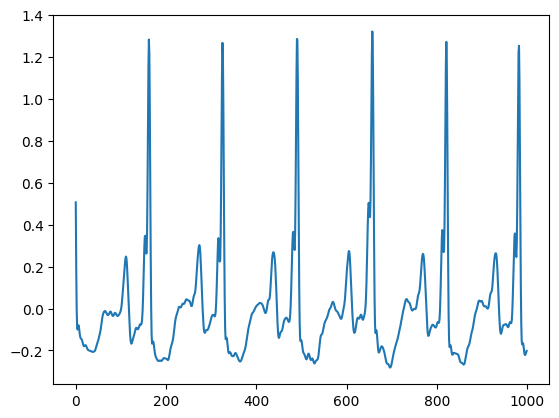

In [15]:
i = 123
print(Y[i])
plt.plot(np.array(X_val_ecg.iloc[i,:1000]))

# CNN

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 4, kernel_size=701, stride=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=5)
        self.conv2 = nn.Conv1d(4, 8, kernel_size=9, stride=1)
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=5)
        self.conv3 = nn.Conv1d(8, 12, kernel_size=3, stride=1)
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=5)
        self.fc1 = nn.Linear(7 * 12, 32)
        self.fc2 = nn.Linear(32, 2)# Calculate the input size based on the output size of last pooling layer

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 7 * 12)  # Reshape for fully connected layer
        x = self.fc1(x)
        y = self.fc2(x)
        return x,y
# # Example usage
# import pandas as pd
# import numpy as np

# # Generate random data with 1700 columns
# data = np.random.rand(1, 1700)

# # Reshape data to add a channel dimension
# data = np.expand_dims(data, axis=0)
# data = torch.tensor(data, dtype=torch.float32).to(device).to(device)

# # Instantiate the model
# model = CNN().to(device)
# # Forward pass
# _,output = model(data)
# print(output.shape)  # This should print torch.Size([1, 2]) indicating batch size 1 and 2 output classes

In [17]:
import torch.optim as optim
import torch.nn.functional as F

cnn = CNN().to(device)
# Define your optimizer and loss function
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 20
batch_size = 32
for epoch in range(epochs):
    cnn.train()
    running_loss = 0.0
    for i in range(0, len(X_train_ecg_tensor), batch_size):
        inputs = X_train_ecg_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()

        _,outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average loss per epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(X_train_ts_tensor)}")

Epoch [1/20], Loss: 0.007935586306371086
Epoch [2/20], Loss: 0.004846846076447263
Epoch [3/20], Loss: 0.0039011064846750767
Epoch [4/20], Loss: 0.003352205776397542
Epoch [5/20], Loss: 0.002967074959452678
Epoch [6/20], Loss: 0.0027334880814246293
Epoch [7/20], Loss: 0.0025227058252963066
Epoch [8/20], Loss: 0.0023576338251306336
Epoch [9/20], Loss: 0.0022326649414999957
Epoch [10/20], Loss: 0.002130579786613061
Epoch [11/20], Loss: 0.002048216188929379
Epoch [12/20], Loss: 0.0019765118512028276
Epoch [13/20], Loss: 0.0018992889837070963
Epoch [14/20], Loss: 0.001837118046902202
Epoch [15/20], Loss: 0.0017624593150184105
Epoch [16/20], Loss: 0.0017351500511656945
Epoch [17/20], Loss: 0.0016709256604568012
Epoch [18/20], Loss: 0.0016467161145369907
Epoch [19/20], Loss: 0.001592991435678261
Epoch [20/20], Loss: 0.0015534739905782274


In [18]:
# Training Accuracy checker
cnn.eval()
with torch.no_grad():
    _,outputs = cnn(X_train_ecg_tensor)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    total = y_train_tensor.size(0)
    accuracy = correct / total
    print(f'Training Accuracy: {accuracy * 100:.2f}%')

# Validation loop
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(0, len(X_val_ecg_tensor), batch_size):
        inputs = X_val_ecg_tensor[i:i+batch_size]
        labels = y_val_tensor[i:i+batch_size]

        _,outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy on validation set: {(100 * correct / total):.2f}%")

Training Accuracy: 98.30%
Accuracy on validation set: 97.43%


In [19]:
torch.save(cnn,'cnn.pth')

# MLP

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network architecture
class Classifier(nn.Module):
    def __init__(self, input_dim):
        super(Classifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)
        self.fc1 = nn.Linear(64 * (input_dim - 4), 128)  # Adjust input_dim based on the number of features
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 2)# 2 output classes for binary classification

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)  # Flatten the output for fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        y = self.fc3(x)
        return x,y

# Instantiate the model
input_dim = 63  # Number of features
mlp = Classifier(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.0001)

# Prepare data loaders
train_dataset = TensorDataset(X_train_ts_tensor, X_train_ecg_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val_ts_tensor, X_val_ecg_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    mlp.train()
    train_loss = 0.0
    for inputs_ts, inputs_ecg, labels in train_loader:
        optimizer.zero_grad()
        _,outputs = mlp(inputs_ts)  # Assuming only time series data is used
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs_ts.size(0)

    # Validation loop
    mlp.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs_ts, inputs_ecg, labels in val_loader:
            _,outputs = mlp(inputs_ts)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs_ts.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / total

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

Epoch [1/20], Train Loss: 0.1505, Val Loss: 0.1211, Val Accuracy: 0.9557
Epoch [2/20], Train Loss: 0.1128, Val Loss: 0.1115, Val Accuracy: 0.9595
Epoch [3/20], Train Loss: 0.1058, Val Loss: 0.1056, Val Accuracy: 0.9617
Epoch [4/20], Train Loss: 0.1015, Val Loss: 0.1018, Val Accuracy: 0.9645
Epoch [5/20], Train Loss: 0.0971, Val Loss: 0.1036, Val Accuracy: 0.9642
Epoch [6/20], Train Loss: 0.0931, Val Loss: 0.0985, Val Accuracy: 0.9651
Epoch [7/20], Train Loss: 0.0907, Val Loss: 0.0956, Val Accuracy: 0.9661
Epoch [8/20], Train Loss: 0.0878, Val Loss: 0.0984, Val Accuracy: 0.9655
Epoch [9/20], Train Loss: 0.0842, Val Loss: 0.0956, Val Accuracy: 0.9647
Epoch [10/20], Train Loss: 0.0823, Val Loss: 0.0909, Val Accuracy: 0.9670
Epoch [11/20], Train Loss: 0.0794, Val Loss: 0.0885, Val Accuracy: 0.9680
Epoch [12/20], Train Loss: 0.0768, Val Loss: 0.0895, Val Accuracy: 0.9678
Epoch [13/20], Train Loss: 0.0754, Val Loss: 0.0872, Val Accuracy: 0.9704
Epoch [14/20], Train Loss: 0.0721, Val Loss: 0.

In [21]:
torch.save(mlp,'mlp.pth')

## LinearSVC on Time Series Features

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_train_flat = X_train_ts_np.reshape(len(X_train_ts_np), -1)
X_val_flat = X_val_ts_np.reshape(len(X_val_ts_np), -1)

svm_model = LinearSVC()
svm_model.fit(X_train_flat, y_train)

y_val_pred = svm_model.predict(X_val_flat)

accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9598268887007244


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Reshape data to fit SVM (assuming the data is already flattened)
X_train_flat = X_train_ts_np.reshape(len(X_train_ts_np), -1)
X_val_flat = X_val_ts_np.reshape(len(X_val_ts_np), -1)

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)

# Instantiate and train the SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = svm_model.predict(X_val_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.959544642017123


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Ensemble

In [24]:
mlp_embeddings,_ = mlp(X_train_ts_tensor)
cnn_embeddings,_ = cnn(X_train_ecg_tensor)

In [25]:
mlp_ = mlp.cpu()
cnn_ = cnn.cpu()

In [26]:
mlp_cpu_embeddings_val = mlp_(X_val_ts_tensor.cpu())[0].detach().numpy()
cnn_cpu_embeddings_val = cnn_(X_val_ecg_tensor.cpu())[0].detach().numpy()

In [27]:
cnn_embeddings.shape, mlp_embeddings.shape

(torch.Size([42515, 32]), torch.Size([42515, 32]))

In [28]:
mlp_cpu_embeddings = mlp_embeddings.detach().cpu().numpy()
cnn_cpu_embeddings = cnn_embeddings.detach().cpu().numpy()

In [29]:
cnn_cpu_embeddings.shape, mlp_cpu_embeddings.shape

((42515, 32), (42515, 32))

In [30]:
concatenated_embeddings_train = np.concatenate((cnn_cpu_embeddings, mlp_cpu_embeddings), axis=1)
concatenated_embeddings_val = np.concatenate((cnn_cpu_embeddings_val, mlp_cpu_embeddings_val), axis=1)
concatenated_embeddings_train.shape, concatenated_embeddings_val.shape

((42515, 64), (10629, 64))

In [31]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Unscaled:
# concatenated_embeddings_train_scaled = concatenated_embeddings_train
# concatenated_embeddings_val_scaled = concatenated_embeddings_val
# Scale the input data
scaler = StandardScaler()
concatenated_embeddings_train_scaled = scaler.fit_transform(concatenated_embeddings_train)
concatenated_embeddings_val_scaled = scaler.transform(concatenated_embeddings_val)

# Instantiate and train the SVM model
svm_model = LinearSVC()
svm_model.fit(concatenated_embeddings_train_scaled, y_train)

# Predict on validation set
y_val_pred = svm_model.predict(concatenated_embeddings_val_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9877693103772698


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
from sklearn.metrics import confusion_matrix

def sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

sensitivity, specificity = sensitivity_specificity(y_val, y_val_pred)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Confusion Matrix:
[[6632   80]
 [  50 3867]]
Sensitivity: 0.9872351289251978
Specificity: 0.9880810488676997


# **The End**